## Exercise 1

In [1]:
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math

def third_function_pdf(x,x0, sigma):
    numerator = np.exp(-np.power(x - x0, 2.) / (2 * sigma**2)) * (1/ (sigma*np.sqrt(2 * np.pi))) - np.exp(-np.power(x + x0, 2.)/ (2 * sigma**2)) * (1/ (sigma * np.sqrt(2 * np.pi)))
    return erf(x0/math.sqrt(2*sigma)) * numerator

Interpolating the functions


In [2]:
pdf_object = interpolation.PDF()
x_gauss = np.linspace(-5, 5, 500)
y_gauss = [pdf_object.gaussian_oned_pdf(a,0,1) for a in x_gauss]
gauss_generator = interpolation.LinearInterp(x_gauss, y_gauss, [-3,3])

x_third = np.linspace(0, 10, 500)
y_third = [third_function_pdf(a, 4, 1) for a in x_third]
third_generator = interpolation.LinearInterp(x_third, y_third,[0,10])




We do the same procedure for all the possible $N$. First, generate $N$ points using our interpolation. Then, binning the lists of points for each distribution. Next, we compute the relative error for the expected number of points in each bin and make plots.

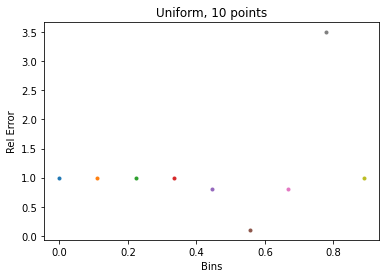

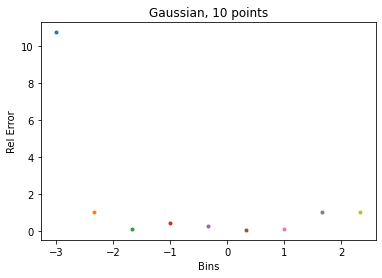

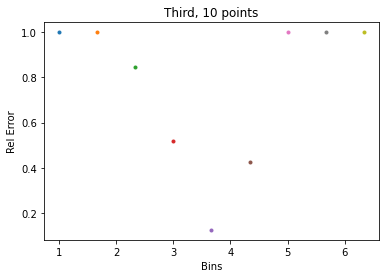

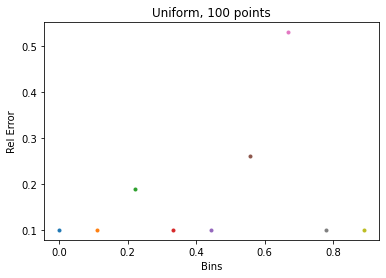

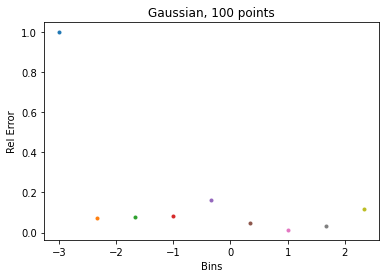

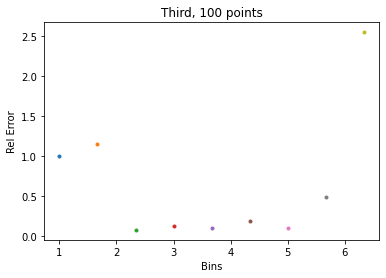

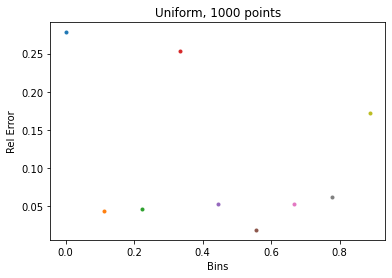

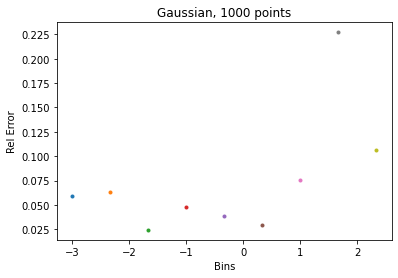

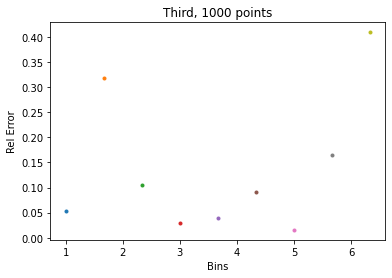

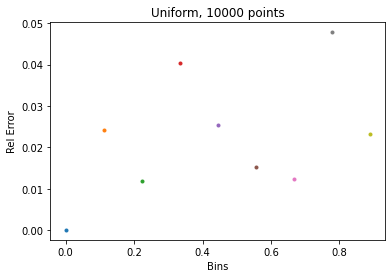

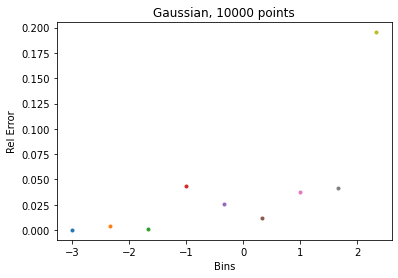

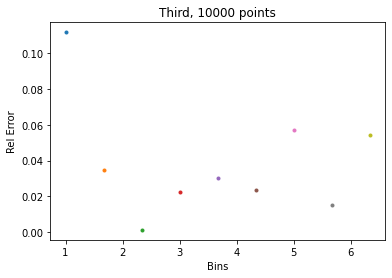

In [18]:
N_list = [10,100, 1000, 10000]
error_list = []
for N in N_list:
    uniform_list = []
    gaussian_list = []
    third_list = []
    
    for a in range (0, N): #This for generate the N points for each distribution
        uniform_list.append(rd.random())
        new_point_gauss= gauss_generator.generate_random_point()
        gaussian_list.append(new_point_gauss[0])
        new_point_third =third_generator.generate_random_point()
        third_list.append(new_point_third[0])
    #Below, we make the binning of the generated points for each distribution
    uniform_binned_list = np.histogram(uniform_list,bins=np.linspace(0,1,10))
    gaussian_binned_list = np.histogram(gaussian_list,bins=np.linspace(-3,3,10))
    third_binned_list = np.histogram(third_list,bins=np.linspace(1,7,10))

    function_list = [uniform_list, gaussian_list, third_list]
    generator_list = [0, gauss_generator, third_generator]
    bin_f_list = [uniform_binned_list, gaussian_binned_list, third_binned_list]
    title_list = ['Uniform','Gaussian','Third']
   #In this loop, we compute the expected value of points for each bin, and then compare to the actual number of points in bin_f_list
    for b in range(0,3):
        generator = generator_list[b]
        function = function_list[b]
        error_n_list = []
        for a in range(0, 9):
            if generator == 0:
                integral =  (bin_f_list[b][1][a+1] - bin_f_list[b][1][0]) / (bin_f_list[b][1][-1] - bin_f_list[b][1][0]) - (bin_f_list[b][1][a] - bin_f_list[b][1][0]) / (bin_f_list[b][1][-1] - bin_f_list[b][1][0])
            else:
                integral = generator.do_cumulative(bin_f_list[b][1][a], bin_f_list[b][1][a+1])
            error_n_list.append((bin_f_list[b][1][a],abs(bin_f_list[b][0][a] /( integral * N) -1)))
            plt.plot(bin_f_list[b][1][a],abs(bin_f_list[b][0][a] /( integral * N) -1), '.')
        error_list.append(error_n_list)
        plt.title(f'{title_list[b]}, {N} points')
        plt.xlabel('Bins')
        plt.ylabel('Rel Error')
        plt.show()